In [1]:
import numpy as np
import pandas as pd
import gudhi as gd
from cleaner import cleaner
import datetime
from halvingdates import *

In [2]:
df = pd.read_csv('data/btcall.csv', index_col='Date', parse_dates=True,).sort_index()

In [3]:
df = cleaner(df)

In [4]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
...,...,...,...,...,...,...
2022-06-23,21100.7,19967.3,21189.8,19907.5,110700.0,5.68
2022-06-24,21226.9,21100.9,21488.7,20743.9,104560.0,0.60
2022-06-25,21489.9,21226.9,21553.4,20917.5,66630.0,1.24


In [5]:
half1 = df[halvingdates[0]:halvingdates[1]][['Price']].rename({'Price':'x'}, axis=1)
half2 = df[halvingdates[1]:halvingdates[2]][['Price']].rename({'Price':'y'}, axis=1)
half3 = df[halvingdates[2]:][['Price']].rename({'Price':'z'}, axis=1)

In [6]:
df2 = pd.concat([half1.reset_index(drop=True), half2.reset_index(drop=True), half3.reset_index(drop=True)], axis=1)

In [7]:
df2 = df2.astype('float')

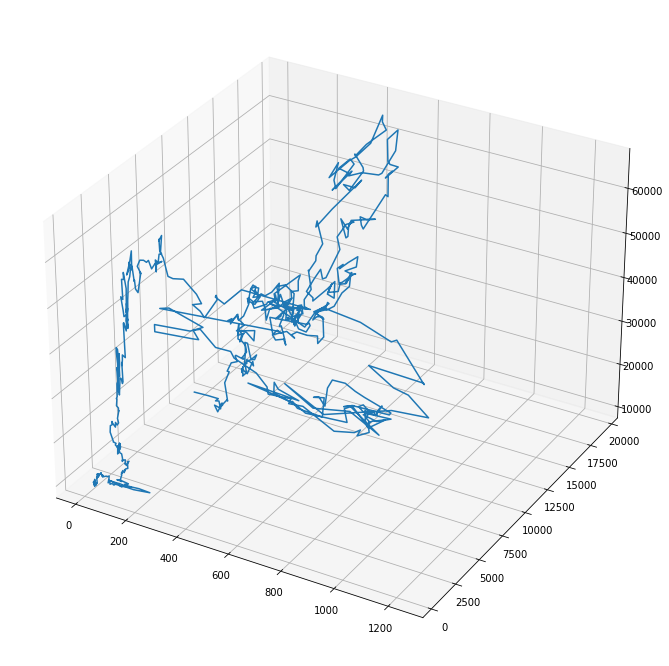

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')
plt.plot(df2.x, df2.y, df2.z)

In [9]:
#skeleton = gd.RipsComplex(points = data_A_sample, max_edge_length = 0.2)

#Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3) 

#rips_generator = Rips_simplex_tree_sample.get_filtration()

In [10]:
alpha_complex = gd.AlphaComplex(points = df2.dropna().values)

st_alpha = alpha_complex.create_simplex_tree()

In [16]:
persist = st_alpha.persistence_intervals_in_dimension(1)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

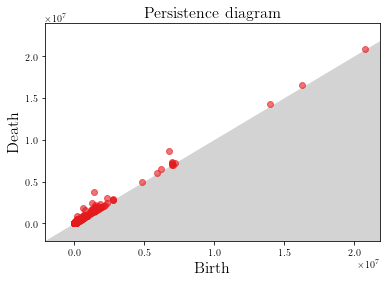

In [17]:
gd.plot_persistence_diagram(persist)

<AxesSubplot:title={'center':'Persistence barcode'}>

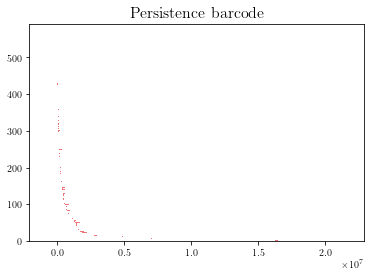

In [21]:
gd.persistence_graphical_tools.plot_persistence_barcode(persist)

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

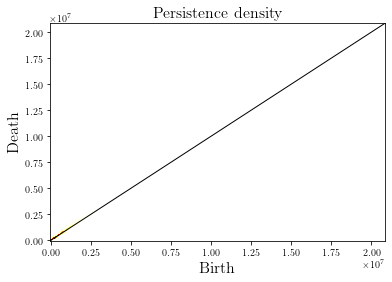

In [22]:
gd.persistence_graphical_tools.plot_persistence_density(persist)

In [23]:
persist

array([[6.61150000e+01, 7.06529014e+01],
       [8.96925000e+01, 9.66127155e+01],
       [9.38825000e+01, 1.01584631e+02],
       ...,
       [1.39729842e+07, 1.42937216e+07],
       [1.62624543e+07, 1.65127603e+07],
       [2.08077956e+07, 2.08079157e+07]])

In [36]:
df2.dropna().rolling(window = 50)

,x,y,z
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
